# hw5


1. 编写一个程序，在一个文件夹中，在其中生成assignment_1.txt, assignment_2.txt,....,assignment_100.txt等100个
文本文件，文件内容为这个文件的绝对路径。然后随机删除其中5个文件。再编写另一个程序，找出缺失的5个文件，并把缺失
的5个文件补齐。

In [ ]:
import os
import random

dirname = "assignments"
if not os.path.exists(dirname):
    os.makedirs(dirname)
for i in range(100):
    path = os.path.join(dirname, f"assignment_{i + 1}")
    if os.path.exists(path):
        pass
    else:
        with open(path, "w") as file:
            file.write(path)
res = sorted(os.listdir(dirname))
print(f"{res}\n")

tmp = res[:]
for i in range(5):
    j = random.randint(1, 100)
    file = tmp.pop(j)
    path = os.path.join(dirname, file)
    if os.path.exists(path):
        os.remove(path)
    else:
        print(path)
        raise ValueError("file does not exist,cant remove it")

removed = []
for file in res:
    if file not in tmp:
        removed.append(file)
        path = os.path.join(dirname, f"back_{file}")
        with open(path, "w") as f:
            f.write(path)
print(f"removed files:{removed}\n")
for file in removed:
    path = os.path.join(dirname, f"back_{file}")
    if os.path.exists(path):
        print(f"add back {file}\n")
    else:
        raise ValueError("file did not add back")


2. 使用numpy.random.randn分别创建10*10，100*100和1000*1000的数据，并分别计算他们的均值和标准差。

In [4]:
import numpy as np


def calculae(size):
    arr = np.random.randn(size, size)
    mean = np.mean(arr)
    std = np.std(arr)
    print(f"mean:{mean}\nstd:{std}\n")


for size in [10, 100, 1000]:
    calculae(size)

mean:0.14237258241801246
std:1.0161376424112125

mean:0.004853799388513371
std:0.9914037111577042

mean:-0.0010278136286748173
std:0.9994410688378552




3. 给定一个一维数组，定义函数moving_average(a,n)计算此数组的滑动平均值，
a为数组，n为窗口长度。给出例子并作图显示。

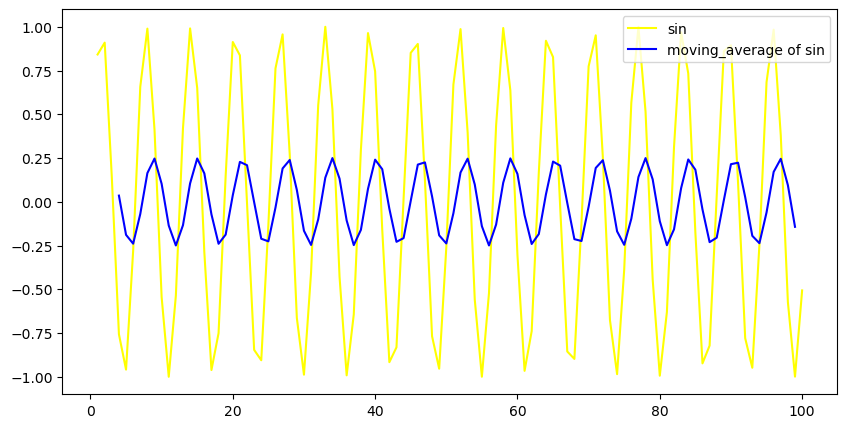

In [12]:
import matplotlib.pyplot as plt


def moving_average(a, n):
    return np.convolve(
        a, np.ones(n) / n, mode="valid"
    )  # 此处可以灵活使用numpy的巻积函数，可以提高速度


x = np.linspace(1, 100, 100)
y = np.sin(x)
width = 5
y_moving_average = moving_average(y, width)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="sin", color="yellow")
plt.plot(
    range(width - 1, len(y)),
    y_moving_average,
    label="moving_average of sin",
    color="blue",
)
plt.legend()
plt.show()


4. 对于一个任意二维数组，给定此数组中某个元素的位置(i,j)和一个长度值l,
从此二维数组中提取出以此元素为中心，维数为(2*l+1,2*l+1)的方阵。如果越界，则使用0补齐。

In [20]:
def extract(arr, i, j, l):
    res = np.zeros((2 * l + 1, 3 * l + 1))
    row, col = arr.shape
    row_start = max(i - l, 0)
    row_end = min(i + l + 1, row)
    col_start = max(j - l, 0)
    col_end = min(j + l + 1, col)
    res[
        l - (i - row_start) : l + (row_end - i), l - (j - col_start) : l + (col_end - j)
    ] = arr[row_start:row_end, col_start:col_end]

    return res


arr2 = np.random.randn(15, 23)
loc = (11, 18)
l = 7
sub = extract(arr2, *loc, l)

# interactivate print
sub

array([[-0.17035116, -1.16326506, -1.07435887, -1.05014145,  0.42537084,
        -1.18269802,  1.85185438,  1.10784641,  0.63841007, -0.32360732,
         0.19149759,  0.47635985,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.21660932, -1.26549787, -0.09659958,  0.88477746, -0.77464628,
         0.4855575 ,  0.50944803,  0.07927404, -0.52316385, -0.26787206,
        -0.07730371,  0.21818646,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.2525406 , -0.2746351 , -1.87038381,  1.56450103, -0.27828352,
        -3.4805981 ,  0.21814431,  1.04358535,  0.72306947,  0.38459465,
         2.7784788 ,  1.19105447,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.5165569 

5. 设二次函数 p(x)=ax^2+bx+c过点(x_i,y_i) for i=1, 2, 3. 求a，b，c的值。
例如过这三个点(-1,1),(0,-1),(2,7)，则可以得到一个线性方程组，使用numpy.linalg中solve函数解方程即可。

In [19]:
A = np.array([[1, 1, 1], [0, 0, 1], [4, 2, 1]])
B = [1, -1, 7]
a, b, c = np.linalg.solve(A, B)
print(a, b, c)

2.0 0.0 -1.0
